In [1]:
import sys
sys.path.append('..')

import navbench as nb
from navbench import improc as ip

FRAME_DIST = 500
IMSIZE = (180, 55)
FR_STEP = 1
FRAME = 700

resize = ip.resize(*IMSIZE)

db = nb.Database('../datasets/bottom_of_campus/straight_route2_fwd')

images, snap, entries = db.load_test_frames(
    FRAME, FRAME_DIST, resize, fr_step=FR_STEP)

goal_idx = int((FRAME - entries[0]) / FR_STEP)
assert entries[goal_idx] == FRAME

Testing frames 200 to 1200 (n=1001)


## Basic catchment area example
This is calculated as the number of frames over which the image difference is increasing, starting from the goal location (dashed line). Median filtering is applied to filter noise.

1 zero values are not being shown


Text(0.5, 1.0, 'Median filtering over 11 frames')

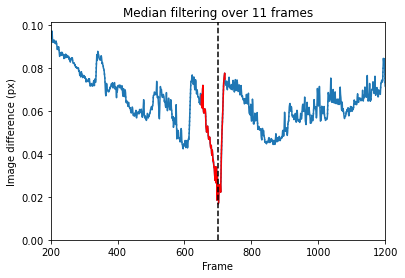

In [2]:
MEDFILT_SIZE = 11

idf = nb.route_idf(images, snap)
ca = nb.calculate_ca(idf, medfilt_size=MEDFILT_SIZE)

ax = ca.plot(entries)
ax.set_ylim(bottom=0)
ax.set_xlabel('Frame')
ax.set_ylabel('Image difference (px)')
ax.set_title('Median filtering over %i frames' % MEDFILT_SIZE)

## Rotational catchment area
A rotational catchment area (RCA) is calculated as with a regular CA, except that instead of using image difference as the threshold, heading errors (as computed with an RIDF) are used. The edges of the RCA are defined as the points at which the heading errors first exceed a given threshold (here: 15°).

Text(0.5, 1.0, 'Median filtering over 3 frames')

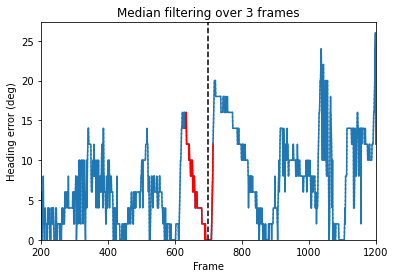

In [3]:
MEDFILT_SIZE = 3

ths = nb.route_ridf_errors(images, snap)
ca = nb.calculate_rca(ths, thresh=15, goal_idx=goal_idx, medfilt_size=MEDFILT_SIZE)

ax = ca.plot(entries, filter_zeros=False)
ax.set_xlabel('Frame')
ax.set_ylabel('Heading error (deg)')
ax.set_title('Median filtering over %i frames' % MEDFILT_SIZE)